# Dataset Overview
This is a dataset for death counts in a state in US. This dataset counts the death cases for each disease from 2014 to 2019.

In [32]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_2ba5da452624483ab31e58a1e1af5108 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_2ba5da452624483ab31e58a1e1af5108 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_2ba5da452624483ab31e58a1e1af5108 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LZdHfZ1lTirTedGM6EJZPbBms6k3cw0rh2NjXw9MGOQ_',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_2ba5da452624483ab31e58a1e1af5108)

body = client_2ba5da452624483ab31e58a1e1af5108.get_object(Bucket='ibmcontest-donotdelete-pr-jiktskkwbuzrqv',Key='all_death.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Jurisdiction of Occurrence,Year,Month,All Cause,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,...,Other Diseases of Respiratory System,"Nephritis, Nephrotic Syndrome, and Nephrosis","Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",Diseases of Heart,Cerebrovascular Diseases,Accidents (Unintentional Injuries),Motor Vehicle Accidents,Intentional Self-Harm (Suicide),Assault (Homicide),Drug Overdose
0,United States,2014,1,243298,226621,3944,51101,7344,8305,7929,...,3466,4600,2815,58229,12074,11461,2572,3320,1213,4026
1,United States,2015,1,265355,247269,4194,52346,8053,11638,10005,...,3797,4979,3005,63190,13576,12311,2754,3618,1437,4354
2,United States,2016,1,245823,227341,3846,51863,7392,10612,5295,...,3705,4645,2755,58049,12968,12559,2734,3720,1499,4631
3,United States,2017,1,262832,241918,4089,52120,7907,12018,6925,...,4083,4818,2769,61650,13595,14520,3034,3709,1726,6233
4,United States,2018,1,286744,265418,4502,52876,8674,13410,12164,...,4603,5346,3138,67024,14653,14748,3010,3966,1674,5659


# Cleaning Data

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 21 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   Jurisdiction of Occurrence                                                                72 non-null     object
 1   Year                                                                                      72 non-null     int64 
 2   Month                                                                                     72 non-null     int64 
 3   All Cause                                                                                 72 non-null     int64 
 4   Natural Cause                                                                             72 non-null     int64 
 5   Septicemia                                                        

## There is no null values in the dataset

In [35]:

df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
67    False
68    False
69    False
70    False
71    False
Length: 72, dtype: bool

## There is no duplicated rows

In [36]:
# checking data types
df.dtypes

Jurisdiction of Occurrence                                                                  object
Year                                                                                         int64
Month                                                                                        int64
All Cause                                                                                    int64
Natural Cause                                                                                int64
Septicemia                                                                                   int64
Malignant Neoplasms                                                                          int64
Diabetes Mellitus                                                                            int64
Alzheimer Disease                                                                            int64
Influenza and Pneumonia                                                                      int64
Chronic Lo

In [37]:
df.shape

(72, 21)

# Exploring Data

In [38]:
df.columns

Index(['Jurisdiction of Occurrence', 'Year', 'Month', 'All Cause',
       'Natural Cause', 'Septicemia', 'Malignant Neoplasms',
       'Diabetes Mellitus', 'Alzheimer Disease', 'Influenza and Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System',
       'Nephritis, Nephrotic Syndrome, and Nephrosis',
       'Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified',
       'Diseases of Heart', 'Cerebrovascular Diseases',
       'Accidents (Unintentional Injuries)', 'Motor Vehicle Accidents',
       'Intentional Self-Harm (Suicide)', 'Assault (Homicide)',
       'Drug Overdose'],
      dtype='object')

In [39]:
df.drop('Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified', axis=1, inplace=True)

In [63]:
# finding the total death cases for each disease
# We are not interested in those who died due to natural causes so I am going to exclude them

sums = []
columns = df.columns[5:20]
for col in columns:
    sums.append(df[col].sum())
sums

[240397,
 3583651,
 492238,
 685127,
 328401,
 933404,
 243316,
 301735,
 3845329,
 859766,
 953976,
 232224,
 275012,
 110508,
 371325]

<AxesSubplot:xlabel='disease'>

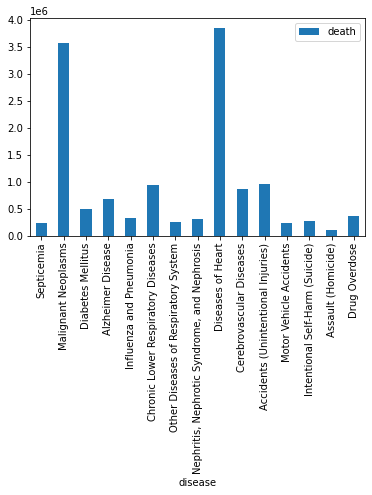

In [64]:
#bar chart to showcase the number of death cases for each disease

disease_and_deaths_df = pd.DataFrame({'disease':columns, 'death':sums})

disease_and_deaths_df.plot.bar(x = 'disease', y = 'death')

<AxesSubplot:ylabel='disease'>

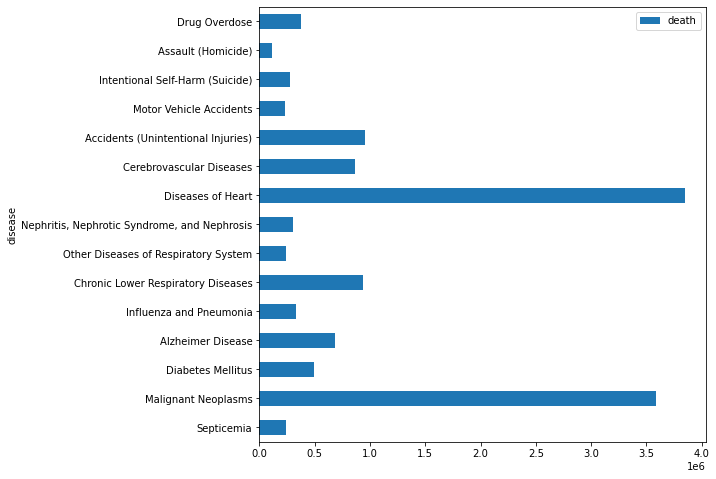

In [65]:

disease_and_deaths_df.plot.barh(x = 'disease', y = 'death', figsize=(8, 8))

<ul>
<li>The highest number of death was due to <b>Heart Diseases</b> and <b>Malignant Neoplasms</b> which is <b>Cancer</b>.</li>
    
<li>Another thing that surprised me is that the total death cases due to diabetes is 492238 which is too low if compared to Heart diseases and cencer although there are a lot of patients that suffer from diabetes (about 422 millions) than those who suffer from Heart diseases or Cancer (According to WHO)</li>
    
<li>The number of Peaple who died due to drug overdose is greater than those who died due to Motor Vehicle Accident, Suicide, Homocide and some respiatory system diseases so it is really important for health care providers to give due care to this point.</li>
</ul>

<AxesSubplot:title={'center':'Diseases And Death'}, ylabel='death'>

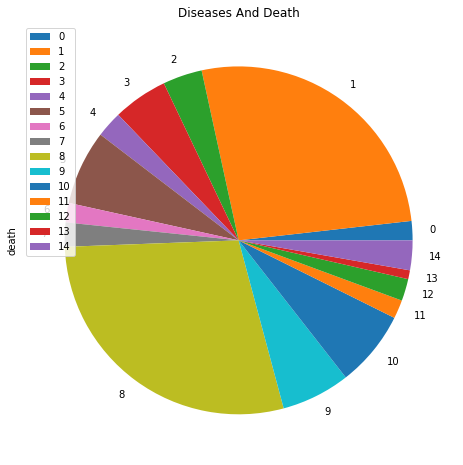

In [66]:
# pie cart to do the samething
disease_and_deaths_df.plot.pie(x = 'disease', y = 'death', figsize=(8, 8), title="Diseases And Death")

In [44]:
years = df["Year"].unique()
years

array([2014, 2015, 2016, 2017, 2018, 2019])

In [45]:
years_all_sums = []
for year in years:
    all_cases = df[df["Year"] == year]["All Cause"].sum()
    years_all_sums .append(all_cases)
years_all_sums

[2626418, 2712630, 2744248, 2813503, 2839205, 2854838]

<AxesSubplot:title={'center':'The number of death cases due to diseases over years'}, xlabel='year'>

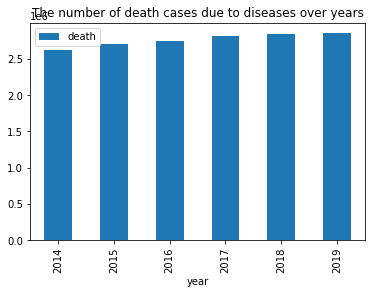

In [46]:
years_and_deaths_df = pd.DataFrame({'year':years, 'death':years_all_sums})
years_and_deaths_df.plot.bar(x='year', y='death', title='The number of death cases due to diseases over years')

**We can say that the death rate is slightly growing.**

In [47]:
# let's now chase some specific diseases over the five years
# I will start with Cancer
years = df["Year"].unique()
def disease_over_years(disease):
    disease_over_years = []
    for year in years:
        total = df[df["Year"] == year][disease].sum()
        disease_over_years.append(total)
    return disease_over_years

cancer_over_years = disease_over_years("Malignant Neoplasms")
cancer_over_years

[591700, 595930, 598038, 599108, 599274, 599601]

<AxesSubplot:title={'center':'Cancer Over The Last Five years'}, xlabel='year'>

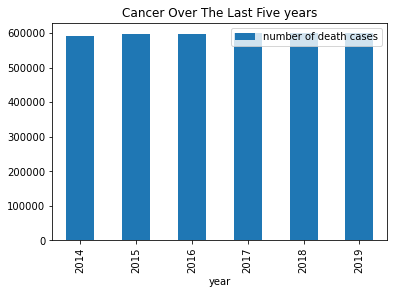

In [48]:
cancer_over_years = np.array(cancer_over_years)
cancer_over_years_df = pd.DataFrame({'year':years, 'number of death cases':cancer_over_years})

cancer_over_years_df.plot.bar(x = "year", y='number of death cases', title='Cancer Over The Last Five years')

**Also there is a slight growth in death rate due to cancerious tumours**  

In [49]:
## Let us now chase Heart diseases

heart_over_years = disease_over_years('Diseases of Heart')
heart_over_years

[614348, 633842, 635260, 647457, 655381, 659041]

<AxesSubplot:xlabel='year'>

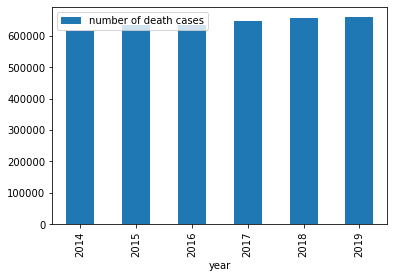

In [50]:
heart_over_years_df = pd.DataFrame({'year':years, 'number of death cases':heart_over_years})
heart_over_years_df.plot.bar(x='year', y='number of death cases')

**Same thing here, but the growth in death rate is slightly greater than cancer**

# Conslusions

<ul>
<li>The highest number of death was due to **Heart Diseases** and **Malignant Neoplasms** which is **Cancer**.</li>
    
<li>Another thing that surprised me is that the total death cases due to diabetes is 492238 which is too low if compared to Heart diseases and cencer although there are a lot of patients that suffer from diabetes (about 422 millions) than those who suffer from Heart diseases or Cancer (According to WHO)</li>
    
<li>The number of Peaple who died due to drug overdose is greater than those who died due to Motor Vehicle Accident, Suicide, Homocide and some respiatory system diseases so it is really important for health care providers to give due care to this point.</li>
  
<li> There is a slight growth in the number of death cases in general and duo to Heart diseases and Cancer in particular.</li>

<li>It is normal that the greatest number of peaple died due to natural causes but we are interested in diseases</li>

<li>275012 people died due to Suicide so, we should extert more effort in psycology to reduce this number</li>
    
<li>Also There are 232224 people died because of road accidents so adopting AI and self-drivng cars , I think, will help reduce this number and save many people from death.
</ul>

In [51]:
!jupyter nbconvert Your_Slide_Deck_Name.ipynb--to slides --post serve  --no-input --no-prompt

[NbConvertApp] WARNING | pattern 'Your_Slide_Deck_Name.ipynb--to' matched no files
[NbConvertApp] WARNING | pattern 'slides' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the